In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [8]:
sal_train=pd.read_csv('SalaryData_Train.csv')
sal_test=pd.read_csv('SalaryData_Test.csv')
sal_train.columns
sal_test.columns
string_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [9]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:xlabel='workclass', ylabel='age'>

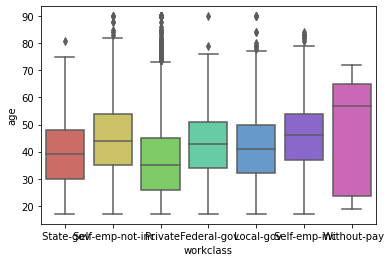

In [10]:
sns.boxplot(x="workclass",y="age",data=sal_train,palette = "hls")

In [11]:
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


<AxesSubplot:xlabel='education', ylabel='age'>

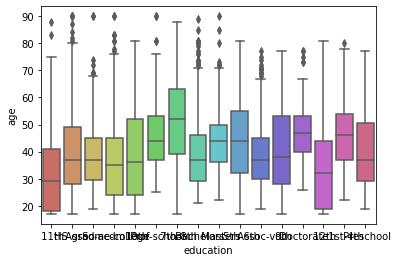

In [12]:
sns.boxplot(x="education",y="age",data=sal_test,palette = "hls")

In [13]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in string_col:
    sal_train[i]=label_encoder.fit_transform(sal_train[i])
    sal_test[i]=label_encoder.fit_transform(sal_test[i])

In [14]:
train_x=sal_train.iloc[0:500,0:13]
train_y=sal_train.iloc[0:500,13]
test_x=sal_test.iloc[0:300,0:13]
test_y=sal_test.iloc[0:300,13]

In [15]:
from sklearn.svm import SVC

#kernel=linear
model_linear=SVC(kernel='linear')
model_linear.fit(train_x,train_y)
train_pred_lin=model_linear.predict(train_x)
test_pred_lin=model_linear.predict(test_x)
train_lin_acc=np.mean(train_pred_lin==train_y)
test_lin_acc=np.mean(test_pred_lin==test_y)
train_lin_acc

0.818

In [16]:
test_lin_acc

0.8166666666666667

In [17]:
#kernel=poly
model_poly=SVC(kernel='poly')
model_poly.fit(train_x,train_y)
train_pred_poly=model_poly.predict(train_x)
test_pred_poly=model_poly.predict(test_x)
train_poly_acc=np.mean(train_pred_poly==train_y)
test_poly_acc=np.mean(test_pred_poly==test_y)
train_poly_acc#81.2


0.812

In [18]:
test_poly_acc

0.8033333333333333

In [19]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(train_x,train_y)
train_pred_rbf=model_rbf.predict(train_x)
test_pred_rbf=model_rbf.predict(test_x)
train_rbf_acc=np.mean(train_pred_rbf==train_y)
test_rbf_acc=np.mean(test_pred_rbf==test_y)
train_rbf_acc

0.812

In [20]:
test_rbf_acc

0.8033333333333333